# Import Packages

In [1]:
!pip install contractions

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
!pip install emoji

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
!pip install keras-self-attention

Defaulting to user installation because normal site-packages is not writeable
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for keras-self-attention: filename=keras_self_attention-0.51.0-py3-none-any.whl size=18919 sha256=12dd49fe4c459c2f65f8c150ac6d1a5985dccad0efc13a7c45a80484370966bf
  Stored in directory: c:\users\asus\appdata\local\pip\cache\wheels\9a\9d\6e\09a0f61c2edeaea9f96fecdc67f31455c363bb44a4ddabe746
Successfully built keras-self-attention



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import SMOTE

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold,StratifiedKFold,cross_val_predict,cross_val_score
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder


import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('punkt_tab')

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import contractions
import emoji


from wordcloud import WordCloud
from collections import Counter

from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, BatchNormalization, GlobalMaxPooling1D, LSTM, Embedding, Bidirectional
from keras.optimizers import Adam

from keras.utils import to_categorical
from keras_self_attention import SeqSelfAttention

RANDOM_SEED = 100

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


# Load Data

In [5]:
#Import Data dari Google Drive
import gdown
url = 'https://drive.google.com/drive/folders/1hn-BDSkwhFsterUcpfi7tUxT5oBBuDxh?usp=sharing'
gdown.download_folder(url)

Retrieving folder contents


Processing file 1P1_lcxb2Nold0cE4ylgqI9krADEPBtba GPT-Sentimental-Analysis.csv


Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=1P1_lcxb2Nold0cE4ylgqI9krADEPBtba
To: c:\Nicholas\Universitas Indonesia\Kuliah\Semester 6\AnDat Tidak Terstruktur\UTS\Data UTS Andat Tidak Terstruktur\GPT-Sentimental-Analysis.csv
100%|██████████| 35.3M/35.3M [00:17<00:00, 2.04MB/s]
Download completed


['c:\\Nicholas\\Universitas Indonesia\\Kuliah\\Semester 6\\AnDat Tidak Terstruktur\\UTS\\Data UTS Andat Tidak Terstruktur\\GPT-Sentimental-Analysis.csv']

In [7]:
#Load Data
data_raw = pd.read_csv("C:\\Nicholas\\Universitas Indonesia\\Kuliah\\Semester 6\\AnDat Tidak Terstruktur\\UTS\\Data UTS Andat Tidak Terstruktur\\GPT-Sentimental-Analysis.csv")
data_raw.shape

(219294, 3)

In [8]:
data_raw.head(10)

,Unnamed: 0,tweets,labels
0,0,ChatGPT: Optimizing Language Models for Dialog...,neutral
1,1,"Try talking with ChatGPT, our new AI system wh...",good
2,2,ChatGPT: Optimizing Language Models for Dialog...,neutral
3,3,"THRILLED to share that ChatGPT, our new model ...",good
4,4,"As of 2 minutes ago, @OpenAI released their ne...",bad
5,5,"Just launched ChatGPT, our new AI system which...",good
6,6,"As of 2 minutes ago, @OpenAI released their ne...",bad
7,7,ChatGPT coming out strong refusing to help me ...,good
8,8,#0penAl just deployed a thing I've been helpin...,good
9,9,Research preview of our newest model: ChatGPT\...,neutral


# Preprocessing Data & EDA

## Sampling Data

In [9]:
# data_sampled=data_raw.sample(n=10000, random_state=RANDOM_SEED)

In [10]:
data_raw.shape #Dimensi Data Asli

(219294, 3)

Label menunjukkan sentimen dari tweet yang membahas terkait ChatGPT. Terdapat 3 kategori sentiment yaitu, neutral, good, dan bad.







## Data Cleaning

In [11]:
data_raw.rename(columns={'Unnamed: 0': 'Id'}, inplace=True)

In [12]:
data_raw.dtypes

Id         int64
tweets    object
labels    object
dtype: object

In [13]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219294 entries, 0 to 219293
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Id      219294 non-null  int64 
 1   tweets  219294 non-null  object
 2   labels  219294 non-null  object
dtypes: int64(1), object(2)
memory usage: 5.0+ MB


In [14]:
data_raw.iloc[0]

Id                                                        0
tweets    ChatGPT: Optimizing Language Models for Dialog...
labels                                              neutral
Name: 0, dtype: object

In [15]:
#Cek missing value pada data
missing_value = data_raw.isnull().any(axis=1).sum()
print(f"Total Missing Value pada Data : {missing_value}")

Total Missing Value pada Data : 0


Tidak ada missing value pada data

In [16]:
#Cek duplicate pada data 
duplikat_data = data_raw.duplicated().sum()
print(f"Total duplicate pada Data: {duplikat_data}")

Total duplicate pada Data: 0


Tidak ada duplikat pada data

## Text Processing

In [ ]:
#Buat list stopwords
additional_stopwords = ['nt']

stop_words = set(stopwords.words('english')+additional_stopwords)
lemmatizer = WordNetLemmatizer()

def text_preproses(text):
    text = text.lower() #Buat jadi huruf kecil semua
    text = re.sub(r'\s+', ' ', text).strip()  #Remove extra spaces
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)  #Hapus URLs atau Hyperlink
    text = re.compile('<.*?>').sub('', text) #Menghapus HTML tags/markups
    text = contractions.fix(text) #Perpanjang kata yang disingkat
    text = emoji.replace_emoji(text, replace='') #Remove Emoji
    text = re.sub(r'[^a-zA-Z\s]', '', text)  #Remove non-alphabetic characters
    text = re.sub(r'@\w+|#\w+', '', text) #Remove Hashtag dan Mention
    text = re.sub(r'\d',' ',text) #Remove digits

    #Tokenize
    tokens = word_tokenize(text)

    #Remove stopwords
    tokens_filtered = [token for token in tokens if token not in stop_words and len(token) > 1]

    # Lemmatization
    cleaned_tokens = [lemmatizer.lemmatize(token) for token in tokens_filtered]

    return ' '.join(cleaned_tokens)


# Process Data dengan Melakukan Cleaning Teks
data_cleaned = data_raw.copy()
data_cleaned['tweets'] = data_cleaned['tweets'].apply(text_preproses)

In [72]:
data_cleaned.head()

,Id,tweets,labels
0,0,chatgpt optimizing language model dialogue openai,neutral
1,1,try talking chatgpt new ai system optimized di...,good
2,2,chatgpt optimizing language model dialogue ai ...,neutral
3,3,thrilled share chatgpt new model optimized dia...,good
4,4,minute ago openai released new chatgpt nnand u...,bad


## Visualisasi

Akan dilihat Distribusi Target (Labels), Common Words, dan buat WordCloud

In [73]:
# Ubah huruf pertama jadi kapital pada label
data_cleaned['labels'] = data_cleaned['labels'].str.capitalize()
data_cleaned['labels'].head()

,labels
0,Neutral
1,Good
2,Neutral
3,Good
4,Bad


### Distribusi Label

In [74]:
data_cleaned.groupby('labels').count()['tweets'].reset_index().sort_values(by='tweets',ascending=False)

,labels,tweets
0,Bad,107796
1,Good,56011
2,Neutral,55487


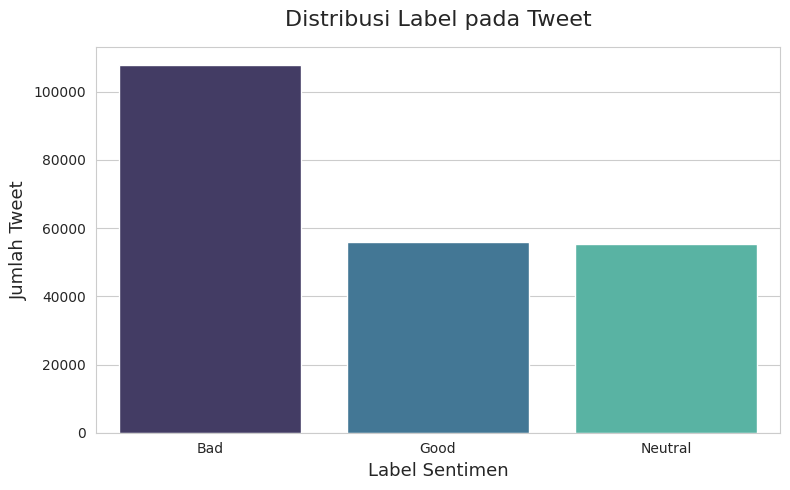

In [75]:
jumlah_label = data_cleaned['labels'].value_counts()

# Set up untuk Barplot
plt.figure(figsize=(8, 5))
sns.set_style("whitegrid")

sns.barplot(x=jumlah_label.index, y=jumlah_label.values,palette='mako',
                 order=['Bad', 'Good', 'Neutral'])

plt.title('Distribusi Label pada Tweet', fontsize=16, pad=15)
plt.xlabel('Label Sentimen', fontsize=13)
plt.ylabel('Jumlah Tweet', fontsize=13)

plt.tight_layout()
plt.show()

Terlihat ada imbalanced pada data

### Common Words

In [ ]:
# Lihat Kata paling sering muncul berdasarkan sentimen
tweet_bad = data_cleaned[data_cleaned['labels'] == 'Bad']['tweets']
tweet_good = data_cleaned[data_cleaned['labels'] == 'Good']['tweets']
tweet_neutral = data_cleaned[data_cleaned['labels'] == 'Neutral']['tweets']

# Split dan Hitung Kata
kata_bad = Counter(word for text in tweet_bad for word in str(text).split())
kata_good = Counter(word for text in tweet_good for word in str(text).split())
kata_neutral = Counter(word for text in tweet_neutral for word in str(text).split())

# Ambil 10 Kata terbanyak
top_kata_bad = kata_bad.most_common(10)
top_kata_good = kata_good.most_common(10)
top_kata_neutral = kata_neutral.most_common(10)

# Buat dataframe untuk bisa melakukan plotting
top_kata_bad_df = pd.DataFrame(top_kata_bad , columns=['Kata','Frekuensi'])
top_kata_good_df = pd.DataFrame(top_kata_good, columns=['Kata','Frekuensi'])
top_kata_neutral_df = pd.DataFrame(top_kata_neutral, columns=['Kata','Frekuensi'])

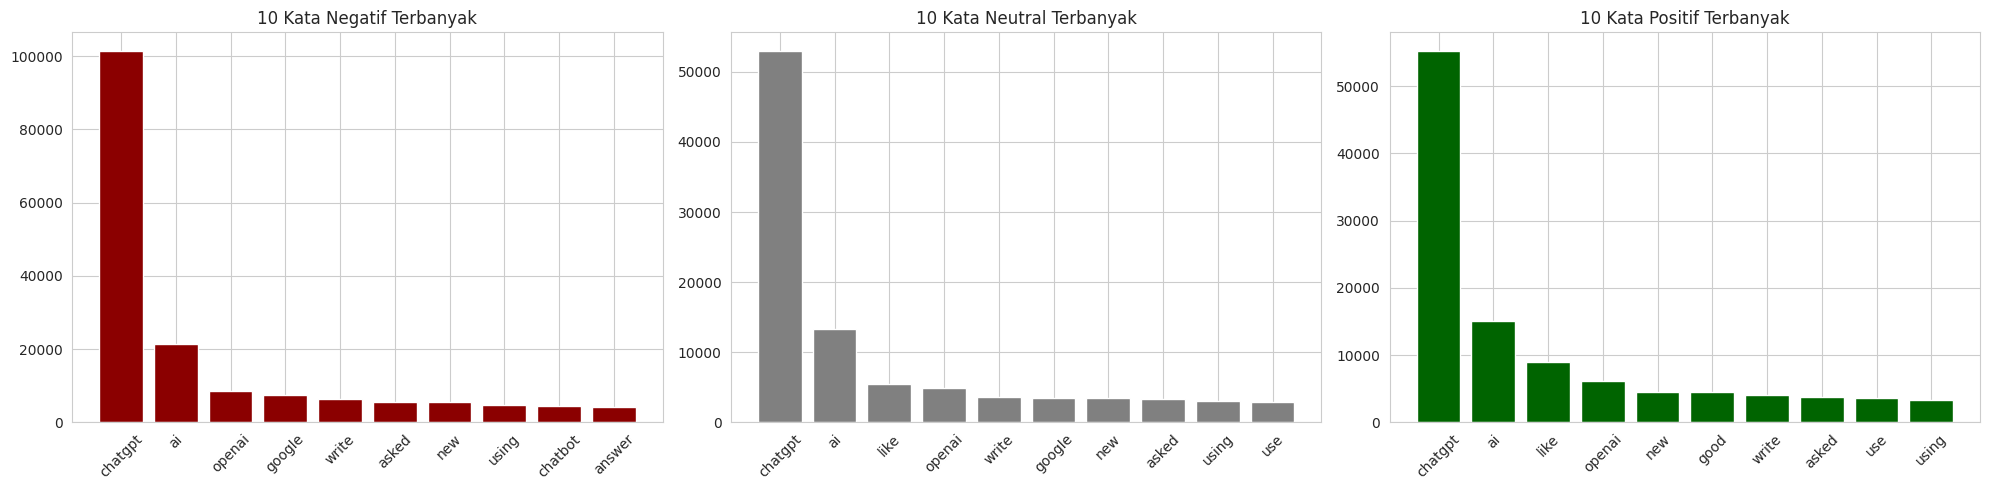

In [ ]:
# Plotting 10 Kata Terumum
plt.figure(figsize=(20, 5))

# Bad Plot
plt.subplot(1, 3, 1)
plt.bar(top_kata_bad_df['Kata'], top_kata_bad_df['Frekuensi'], color='darkred')
plt.title('10 Kata Negatif Terbanyak')
plt.xticks(rotation=45)

# Neutral Plot
plt.subplot(1, 3, 2)
plt.bar(top_kata_neutral_df['Kata'], top_kata_neutral_df['Frekuensi'], color='gray')
plt.title('10 Kata Neutral Terbanyak')
plt.xticks(rotation=45)

# Good Plot
plt.subplot(1, 3, 3)
plt.bar(top_kata_good_df['Kata'], top_kata_good_df['Frekuensi'], color='darkgreen')
plt.title('10 Kata Positif Terbanyak')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [ ]:
# List Kata yang dibuang untuk visualisasi
unwanted_words = {'chatgpt', 'gpt', 'ai', 'google', 'opena', 'openai', 'chatbot', 'via'} 

# Lihat Kata paling sering muncul berdasarkan sentimen
tweet_bad = data_cleaned[data_cleaned['labels'] == 'Bad']['tweets']
tweet_good = data_cleaned[data_cleaned['labels'] == 'Good']['tweets']
tweet_neutral = data_cleaned[data_cleaned['labels'] == 'Neutral']['tweets']

# Filter Kata
kata_bad = Counter(word for text in tweet_bad for word in str(text).split() if word.lower() not in unwanted_words)
kata_good = Counter(word for text in tweet_good for word in str(text).split() if word.lower() not in unwanted_words)
kata_neutral = Counter(word for text in tweet_neutral for word in str(text).split() if word.lower() not in unwanted_words)

# Ambil 10 Kata terbanyak
top_kata_bad = kata_bad.most_common(10)
top_kata_good = kata_good.most_common(10)
top_kata_neutral = kata_neutral.most_common(10)

# Buat dataframe untuk bisa melakukan plotting
top_kata_bad_df = pd.DataFrame(top_kata_bad, columns=['Kata','Frekuensi'])
top_kata_good_df = pd.DataFrame(top_kata_good, columns=['Kata','Frekuensi'])
top_kata_neutral_df = pd.DataFrame(top_kata_neutral, columns=['Kata','Frekuensi'])

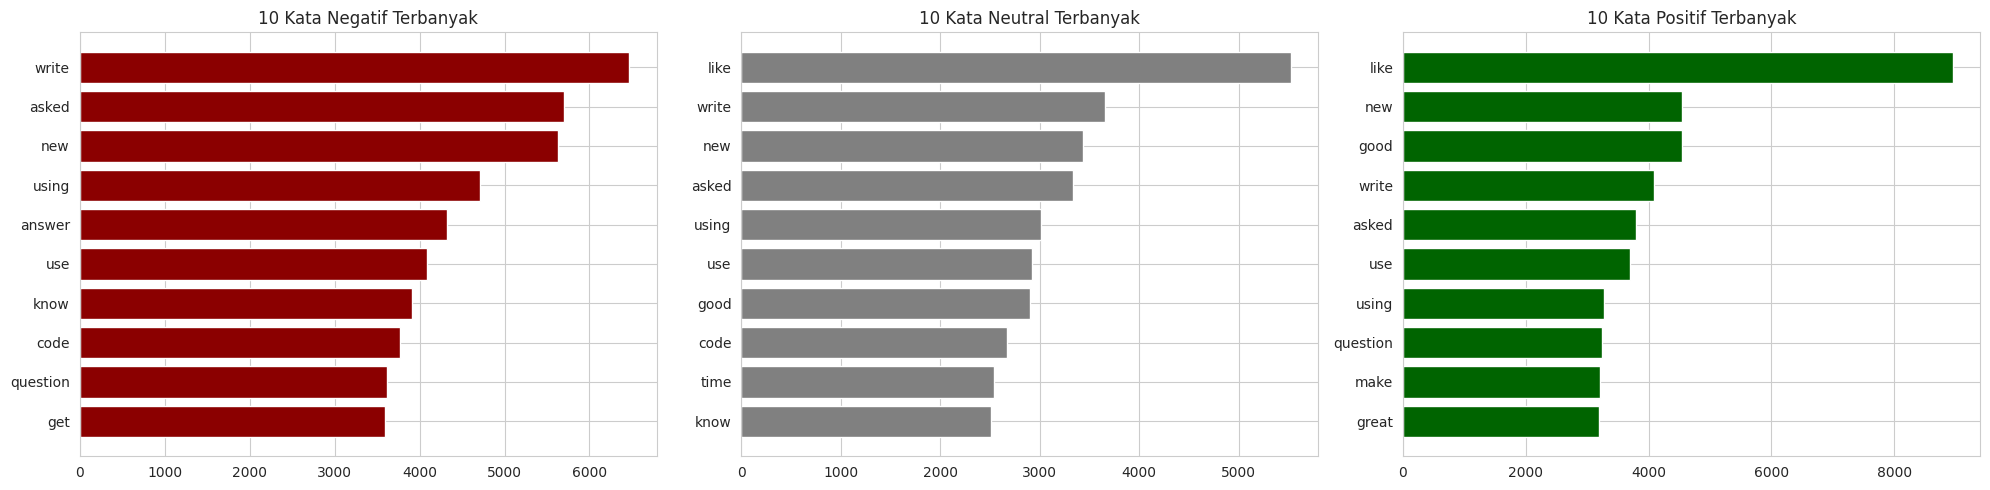

In [ ]:
# Plotting 10 Kata Terumum
plt.figure(figsize=(20, 5))  

# Bad Plot
plt.subplot(1, 3, 1)
plt.barh(top_kata_bad_df['Kata'], top_kata_bad_df['Frekuensi'], color='darkred')
plt.title('10 Kata Negatif Terbanyak')
plt.gca().invert_yaxis()

# Neutral Plot
plt.subplot(1, 3, 2)
plt.barh(top_kata_neutral_df['Kata'], top_kata_neutral_df['Frekuensi'], color='gray')
plt.title('10 Kata Neutral Terbanyak')
plt.gca().invert_yaxis()

# Good Plot
plt.subplot(1, 3, 3)
plt.barh(top_kata_good_df['Kata'], top_kata_good_df['Frekuensi'], color='darkgreen')
plt.title('10 Kata Positif Terbanyak')
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()

### Wordcloud

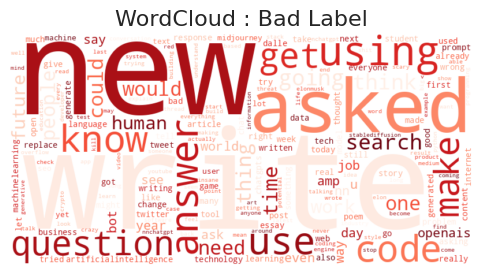

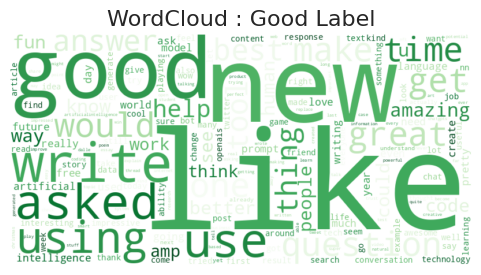

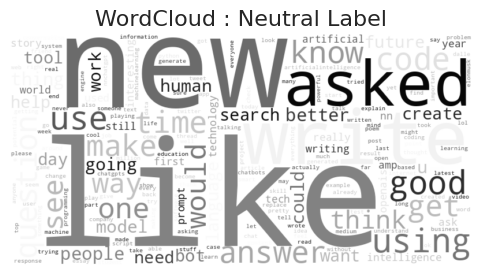

In [ ]:
# Lihat Kata paling sering muncul berdasarkan sentimen (dengan pengecualian unwanted_words)
tweet_bad_wc = " ".join(data_cleaned[data_cleaned['labels'] == 'Bad']['tweets'])
tweet_good_wc = " ".join(data_cleaned[data_cleaned['labels'] == 'Good']['tweets'])
tweet_neutral_wc = " ".join(data_cleaned[data_cleaned['labels'] == 'Neutral']['tweets'])

# Word Cloud untuk Bad Tweet
plt.figure(figsize=(6, 3))
wc_bad= WordCloud(width=800, height=400, background_color='white', colormap='Reds', stopwords=unwanted_words,
               collocations=False).generate(tweet_bad_wc)
plt.imshow(wc_bad, interpolation='bilinear')
plt.title('WordCloud : Bad Label', fontsize=16)
plt.axis('off')
plt.show()

# Word Cloud untuk Good Tweet
plt.figure(figsize=(6, 3))
wc_good = WordCloud(width=800, height=400, background_color='white', colormap='Greens', stopwords=unwanted_words,
               collocations=False).generate(tweet_good_wc)
plt.imshow(wc_good, interpolation='bilinear')
plt.title('WordCloud : Good Label', fontsize=16)
plt.axis('off')
plt.show()

# Word Cloud untuk Neutral Tweet
plt.figure(figsize=(6, 3))
wc_neutral= WordCloud(width=800, height=400, background_color='white', colormap='Grays', stopwords=unwanted_words,
               collocations=False).generate(tweet_neutral_wc)
plt.imshow(wc_neutral, interpolation='bilinear')
plt.title('WordCloud : Neutral Label', fontsize=16)
plt.axis('off')
plt.show()

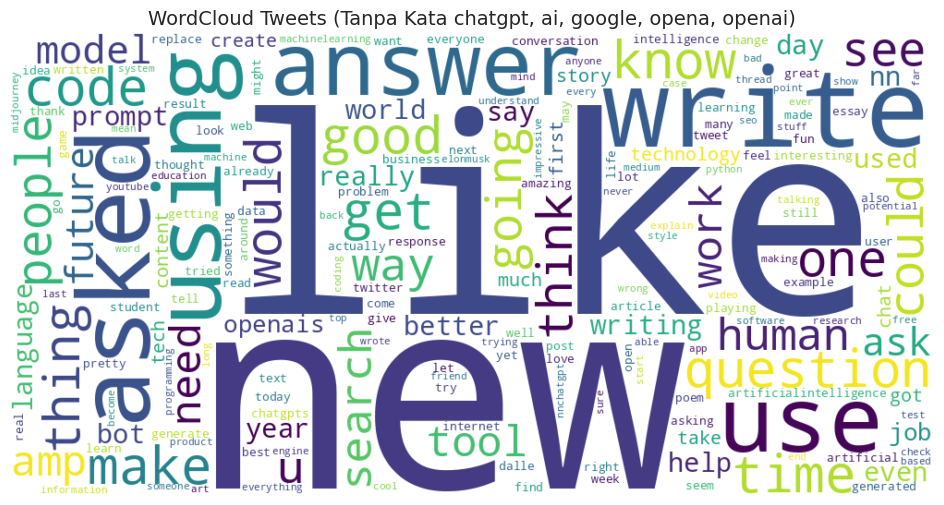

In [ ]:
all_tweets = " ".join(data_cleaned['tweets'])

# Buat Word Cloud dari semua data (dengan pengecualian unwanted_words)
plt.figure(figsize=(12, 6))
wc = WordCloud(width=1000, height=500, background_color='white', colormap='viridis', 
               stopwords=unwanted_words,collocations=False).generate(all_tweets)

plt.imshow(wc, interpolation='bilinear')
plt.title('WordCloud Tweets (Tanpa Kata chatgpt, ai, google, opena, openai)', fontsize=14)
plt.axis('off')
plt.show()

## Tokenisasi Data Teks

In [ ]:
max_kata=4000

tokenizer = Tokenizer(num_words=max_kata)
tokenizer.fit_on_texts(data_cleaned['tweets'])

hasil_tokenisasi = tokenizer.texts_to_sequences(data_cleaned['tweets'])

## Padding

In [ ]:
max_length = max(len(seq) for seq in hasil_tokenisasi) #ambil sekuens terpanjang dari data sebagai batas maks
konten_tweet_pad = pad_sequences(hasil_tokenisasi, maxlen=max_length, padding='post')
print(konten_tweet_pad)

[[   1 1229   48 ...    0    0    0]
 [  99  158    1 ...    0    0    0]
 [   1 1229   48 ...    0    0    0]
 ...
 [   1    0    0 ...    0    0    0]
 [ 616    1  430 ...    0    0    0]
 [   1 1939  202 ...    0    0    0]]


## Label Encoder

In [ ]:
# Ubah Kategori atau Label menjadi sebuah angka
data_sentimen = data_cleaned['labels']
encoder = LabelEncoder()
y = encoder.fit_transform(data_sentimen)
X = konten_tweet_pad

## Split Data

In [87]:
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

Buat Validation data

In [88]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=RANDOM_SEED)

# Model LSTM

## Handle Imbalanced Data

In [ ]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

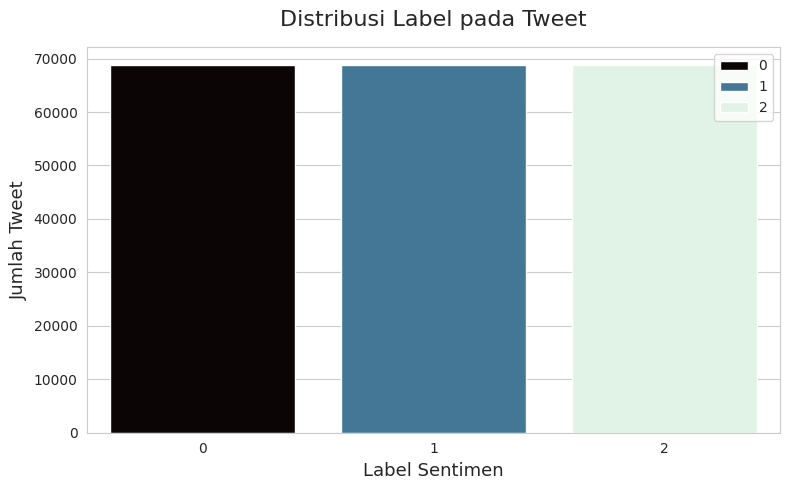

In [ ]:
# Set up untuk Barplot
plt.figure(figsize=(8, 5))
sns.set_style("whitegrid")
sns.countplot(x=y_resampled,hue=y_resampled,palette='mako')
plt.title('Distribusi Label pada Tweet', fontsize=16, pad=15)
plt.xlabel('Label Sentimen', fontsize=13)
plt.ylabel('Jumlah Tweet', fontsize=13)

plt.tight_layout()
plt.show()

## Buat Model BiLSTM

In [ ]:
# Buat label jadi kategorik
y_train_kat = to_categorical(y_resampled)
y_val_kat = to_categorical(y_val)
y_test_kat = to_categorical(y_test)

In [ ]:
# Arsitketur Model Bidirectional LSTM (BiLSTM)
model_LSTM = Sequential()

# Input dan Embedding
model_LSTM.add(Embedding(input_dim=max_kata, output_dim=128, input_length=max_length, input_shape=(max_length,)))

# Bidirecitonal LSTM Layer
model_LSTM.add(Bidirectional(LSTM(128, dropout=0.5, recurrent_dropout=0.5, return_sequences=True)))

# Self-Attention Layer
model_LSTM.add(SeqSelfAttention(attention_activation='sigmoid'))

# Pooling Layer
model_LSTM.add(GlobalMaxPooling1D())
model_LSTM.add(BatchNormalization())

# Dense Layer
model_LSTM.add(Dense(64, activation='relu'))

# Output Layer
model_LSTM.add(Dense(3, activation='softmax'))

optimizer = Adam(learning_rate=0.001)
model_LSTM.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [ ]:
model_LSTM.summary() #Lihat dimensi dan jumlah parameter pada setiap lapisan model

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_8 (Embedding)         │ (None, 35, 128)        │       512,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_7 (Bidirectional) │ (None, 35, 256)        │       263,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ seq_self_attention              │ (None, 35, 256)        │        16,449 │
│ (SeqSelfAttention)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d_5          │ (None, 256)            │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 809,284 (3.09 MB)

 Trainable params: 808,772 (3.09 MB)

 Non-trainable params: 512 (2.00 KB)

# Evaluasi Model

In [ ]:
# Fitting Model BiLSTM
fitting_model = model_LSTM.fit(X_resampled, y_train_kat, epochs=10, validation_data=(X_val, y_val_kat), verbose=1)

# Evaluate Model
y_pred = model_LSTM.predict(X_test)
y_pred_label = np.argmax(y_pred, axis=1) #ambil nilai probabilitas tertinggi dan berdasarkan hal itu, konvert ke kategoriknya (0, 1, 2)

# Classification Report
print(classification_report(y_test, y_pred_label))

Epoch 1/10
6446/6446 ━━━━━━━━━━━━━━━━━━━━ 824s 127ms/step - accuracy: 0.6228 - loss: 0.8201 - val_accuracy: 0.8439 - val_loss: 0.4793
Epoch 2/10
6446/6446 ━━━━━━━━━━━━━━━━━━━━ 821s 127ms/step - accuracy: 0.7387 - loss: 0.6235 - val_accuracy: 0.8600 - val_loss: 0.4454
Epoch 3/10
6446/6446 ━━━━━━━━━━━━━━━━━━━━ 870s 129ms/step - accuracy: 0.7581 - loss: 0.5746 - val_accuracy: 0.8547 - val_loss: 0.4527
Epoch 4/10
6446/6446 ━━━━━━━━━━━━━━━━━━━━ 839s 125ms/step - accuracy: 0.7740 - loss: 0.5364 - val_accuracy: 0.8613 - val_loss: 0.4361
Epoch 5/10
6446/6446 ━━━━━━━━━━━━━━━━━━━━ 824s 128ms/step - accuracy: 0.7810 - loss: 0.5170 - val_accuracy: 0.8572 - val_loss: 0.4471
Epoch 6/10
6446/6446 ━━━━━━━━━━━━━━━━━━━━ 855s 127ms/step - accuracy: 0.7865 - loss: 0.5002 - val_accuracy: 0.8586 - val_loss: 0.4386
Epoch 7/10
6446/6446 ━━━━━━━━━━━━━━━━━━━━ 864s 127ms/step - accuracy: 0.7914 - loss: 0.4865 - val_accuracy: 0.8574 - val_loss: 0.4465
Epoch 8/10
6446/6446 ━━━━━━━━━━━━━━━━━━━━ 865s 127ms/step - ac

Epoch hanya 10 sebab waktu pelatihan model sangat lama apabila lebih besar lagi.

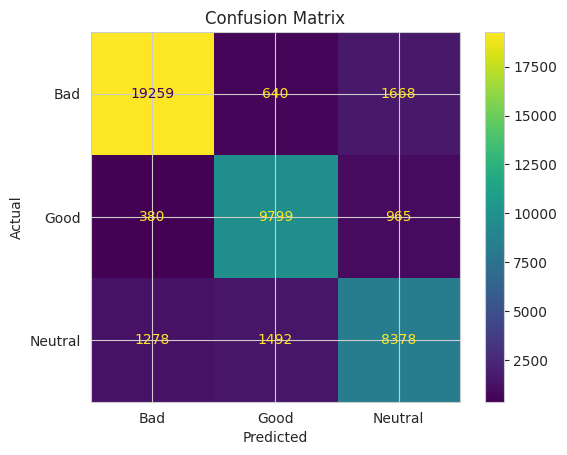

In [ ]:
# Plotting Confusion Matrix
cm = confusion_matrix(y_test, y_pred_label)
plot_cm = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=encoder.classes_)
plot_cm.plot()
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

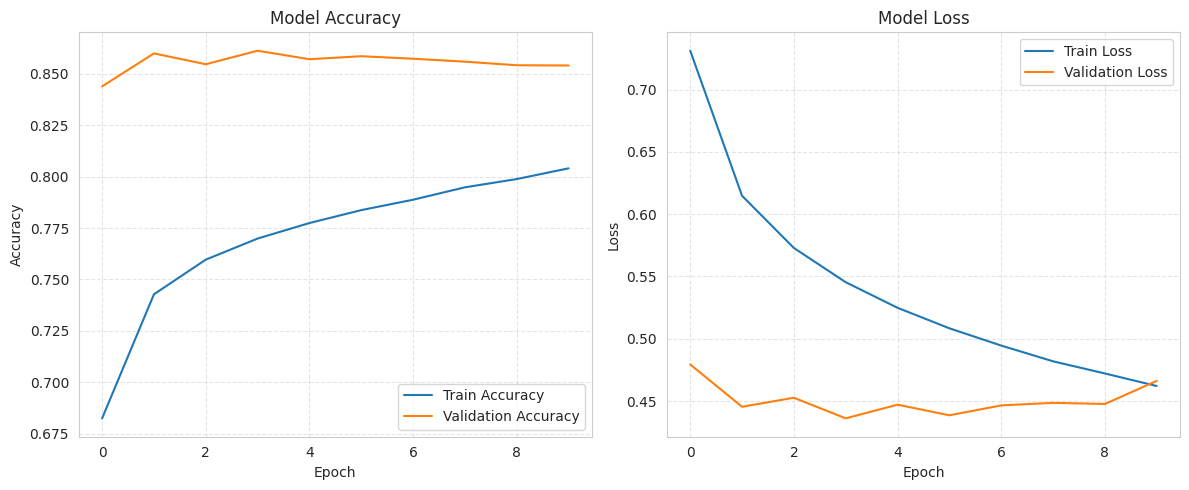

In [ ]:
# Plotting Pergerakan Performa model saat training dan validasi
plt.figure(figsize=(12, 5))

# Plot Akurasi training dan validasi
plt.subplot(1, 2, 1)
plt.plot(fitting_model.history['accuracy'], label='Train Accuracy')
plt.plot(fitting_model.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.grid(True, linestyle='--', alpha=0.5)

# Plot Loss training dan validasi
plt.subplot(1, 2, 2)
plt.plot(fitting_model.history['loss'], label='Train Loss')
plt.plot(fitting_model.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()